# All Peak Sets

**Created**: 9 June 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)
library(ComplexHeatmap)
library(RColorBrewer)
library(circlize)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.c

## Load Data

In [2]:
immune.dir = "/nfs/users/nfs_n/nm18/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/peak_sets/"

wc.output <- system(paste0("wc -l ", immune.dir, "/*.bed"), intern=TRUE)
wc.output <- wc.output[-length(wc.output)]

counts <- gsub(" .*$", "", gsub("^[[:space:]]*", "", wc.output))
cell.type <- gsub("-.*$", "", gsub("^.*/", "", wc.output))
stimulation <- gsub("\\..*", "", gsub("^.*-", "", gsub("^.* ", "", wc.output)))

ia.n.peaks <- data.frame(
    Cell.Type = cell.type,
    Stimulation = stimulation,
    Count = as.numeric(counts)
)

lineages <- read.csv("03_Functional_Interpretation/data/Calderon_et_al_lineages.csv")
ia.n.peaks <- merge(ia.n.peaks, lineages, by.x="Cell.Type", by.y="Cell_Type")

In [3]:
head(ia.n.peaks)

,Cell.Type,Stimulation,Count,Lineage
,<chr>,<chr>,<dbl>,<chr>
1,Bulk_B,Control,54593,B
2,Bulk_B,Stimulated,70407,B
3,CD8pos_T,Control,52598,CD8
4,CD8pos_T,Stimulated,73764,CD8
5,Central_memory_CD8pos_T,Control,51849,CD8
6,Central_memory_CD8pos_T,Stimulated,81964,CD8


In [4]:
immune.dir = "/nfs/users/nfs_n/nm18/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/cell_type_peak_sets/"

wc.output <- system(paste0("wc -l ", immune.dir, "/*.bed"), intern=TRUE)
wc.output <- wc.output[-length(wc.output)]

counts <- gsub(" .*$", "", gsub("^[[:space:]]*", "", wc.output))
cell.type <- gsub("\\..*$", "", gsub("^.*/", "", wc.output))

ia.n.ct.peaks <- data.frame(
    Cell.Type = cell.type,
    Count = as.numeric(counts)
)

lineages <- read.csv("03_Functional_Interpretation/data/Calderon_et_al_lineages.csv")
ia.n.ct.peaks <- merge(ia.n.ct.peaks, lineages, by.x="Cell.Type", by.y="Cell_Type")

In [5]:
head(ia.n.ct.peaks)

,Cell.Type,Count,Lineage
,<chr>,<dbl>,<chr>
1,Bulk_B,76954,B
2,CD8pos_T,81410,CD8
3,Central_memory_CD8pos_T,87109,CD8
4,Effector_CD4pos_T,86298,CD4
5,Effector_memory_CD8pos_T,82647,CD8
6,Follicular_T_Helper,108151,CD4


In [6]:
neutrophil.dir = "/nfs/users/nfs_n/nm18/gains_team282/epigenetics/accessibility/analysis/atac_seq/neutrophil/peak_sets/"

wc.output <- system(paste0("wc -l ", neutrophil.dir, "/*.bed"), intern=TRUE)
wc.output <- wc.output[-length(wc.output)]

counts <- gsub(" .*$", "", gsub("^[[:space:]]*", "", wc.output))
groups <- gsub("\\..*", "", gsub("^.*Neutrophils-", "", gsub("^.* ", "", wc.output)))

rm.n.peaks <- data.frame(
    Group = groups,
    Count = as.numeric(counts)
) %>%
    dplyr::mutate(Category="Ligand") %>%
    dplyr::mutate(Category=ifelse(grepl("EC", Group), "E. coli", Category)) %>%
    dplyr::mutate(Category=ifelse(grepl("SA|WB", Group), "S. aureus", Category)) %>%
    dplyr::mutate(Category=factor(Category, levels=c("Ligand", "S. aureus", "E. coli")))

In [7]:
head(rm.n.peaks)

,Group,Count,Category
,<chr>,<dbl>,<fct>
1,BGP,6853,Ligand
2,Control,16768,Ligand
3,EC1h,65739,E. coli
4,EC4h,14307,E. coli
5,FLAG,31032,Ligand
6,HMGB1,47311,Ligand


In [8]:
lineages <- read.csv("03_Functional_Interpretation/data/Calderon_et_al_lineages.csv")

In [9]:
head(lineages)

,Lineage,Cell_Type
,<chr>,<chr>
1,B,Bulk_B
2,B,Mem_B
3,B,Naive_B
4,B,Plasmablasts
5,CD8,CD8pos_T
6,CD8,Central_memory_CD8pos_T


In [10]:
ia.group.jaccard <- read.table("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/peak_sets_jaccard_values.tsv") %>%
    dplyr::select(Group.X=2, Group.Y=3, Jaccard=1)

In [11]:
head(ia.group.jaccard)

,Group.X,Group.Y,Jaccard
,<chr>,<chr>,<dbl>
1,Bulk_B-Control,Bulk_B-Control,1.000000
2,Bulk_B-Control,Effector_CD4pos_T-Stimulated,0.331941
3,Bulk_B-Control,Follicular_T_Helper-Stimulated,0.313180
4,Bulk_B-Control,CD8pos_T-Control,0.370355
5,Bulk_B-Control,Central_memory_CD8pos_T-Control,0.375204
6,Bulk_B-Control,Gamma_delta_T-Control,0.342657


In [12]:
ia.cell.jaccard <- read.table("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/cell_type_peak_sets_jaccard_values.tsv") %>%
    dplyr::select(Group.X=2, Group.Y=3, Jaccard=1)

In [13]:
head(ia.cell.jaccard)

,Group.X,Group.Y,Jaccard
,<chr>,<chr>,<dbl>
1,Bulk_B,Bulk_B,1.000000
2,Bulk_B,Gamma_delta_T,0.344372
3,Bulk_B,Naive_B,0.505249
4,Bulk_B,CD8pos_T,0.346069
5,Bulk_B,Effector_memory_CD8pos_T,0.331318
6,Bulk_B,Effector_CD4pos_T,0.339457


In [14]:
rm.group.jaccard <- read.table("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/neutrophil/peak_sets_jaccard_values.tsv") %>%
    dplyr::select(Group.X=2, Group.Y=3, Jaccard=1)

In [15]:
head(rm.group.jaccard)

,Group.X,Group.Y,Jaccard
,<chr>,<chr>,<dbl>
1,Neutrophils-BGP,Neutrophils-BGP,1.0000000
2,Neutrophils-BGP,Neutrophils-EC4h,0.2478550
3,Neutrophils-BGP,Neutrophils-LTA,0.2646430
4,Neutrophils-BGP,Neutrophils-SA-3,0.1138910
5,Neutrophils-BGP,Neutrophils-WB,0.2600440
6,Neutrophils-BGP,Neutrophils-SA-1,0.0833503


## Number of Peaks

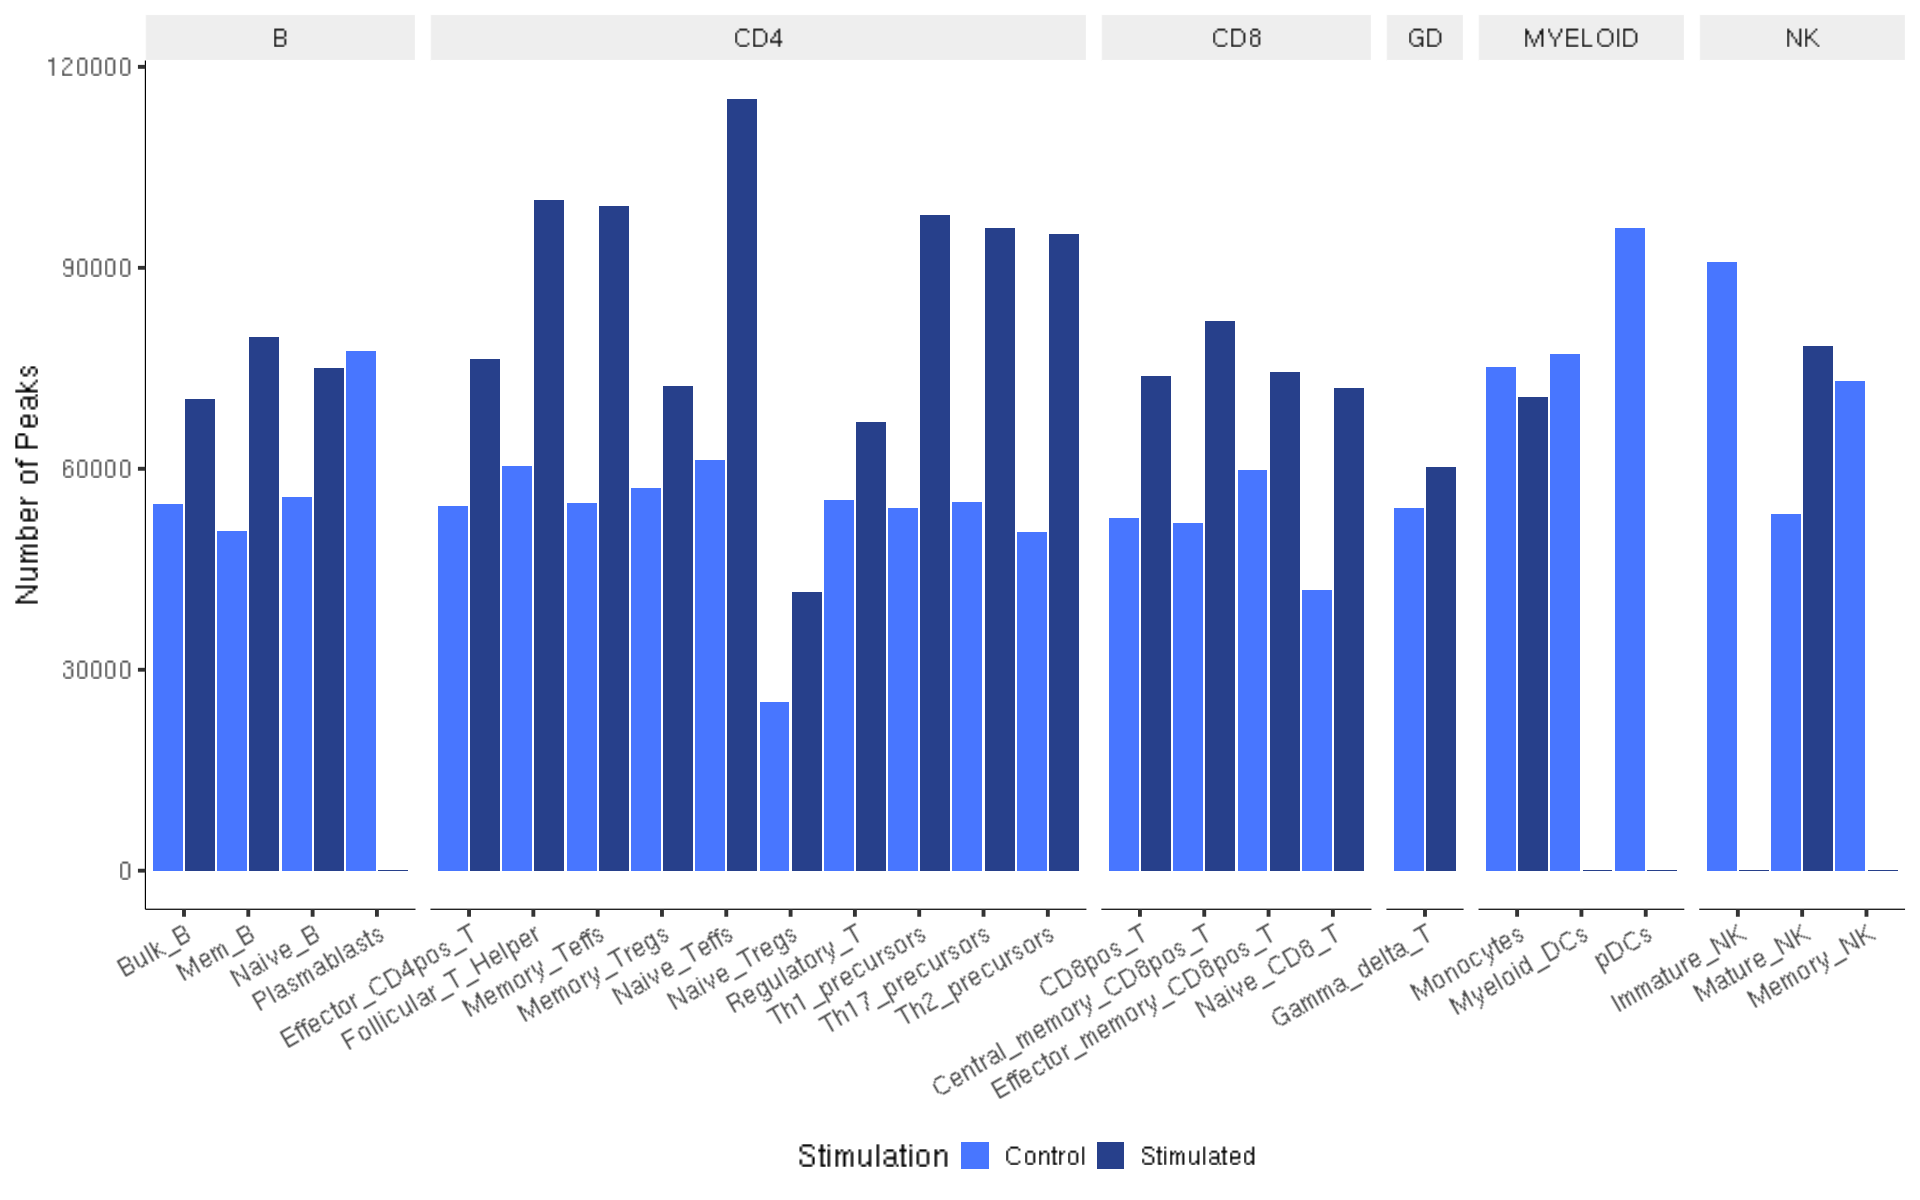

In [17]:
options(repr.plot.width=16, repr.plot.height=10)

ia.n.peaks %>%
    tidyr::spread(Stimulation, Count, fill=0) %>%
    tidyr::gather("Stimulation", "Count", -Cell.Type, -Lineage) %>%
    dplyr::mutate(Stimulation=factor(Stimulation, levels=c("Control", "Stimulated"))) %>%
    ggplot() +
    geom_bar(aes(x=Cell.Type, y=Count, fill=Stimulation), stat="identity", position=position_dodge(1)) +
    scale_fill_manual(values=c("royalblue1", "royalblue4")) +
    facet_grid(. ~ Lineage, scale="free_x", space="free_x") +
    ylab("Number of Peaks") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=30, hjust=1), axis.title.x=element_blank())

ggsave("03_Functional_Interpretation/results/immune_group_peak_counts.pdf", width=16, height=10)

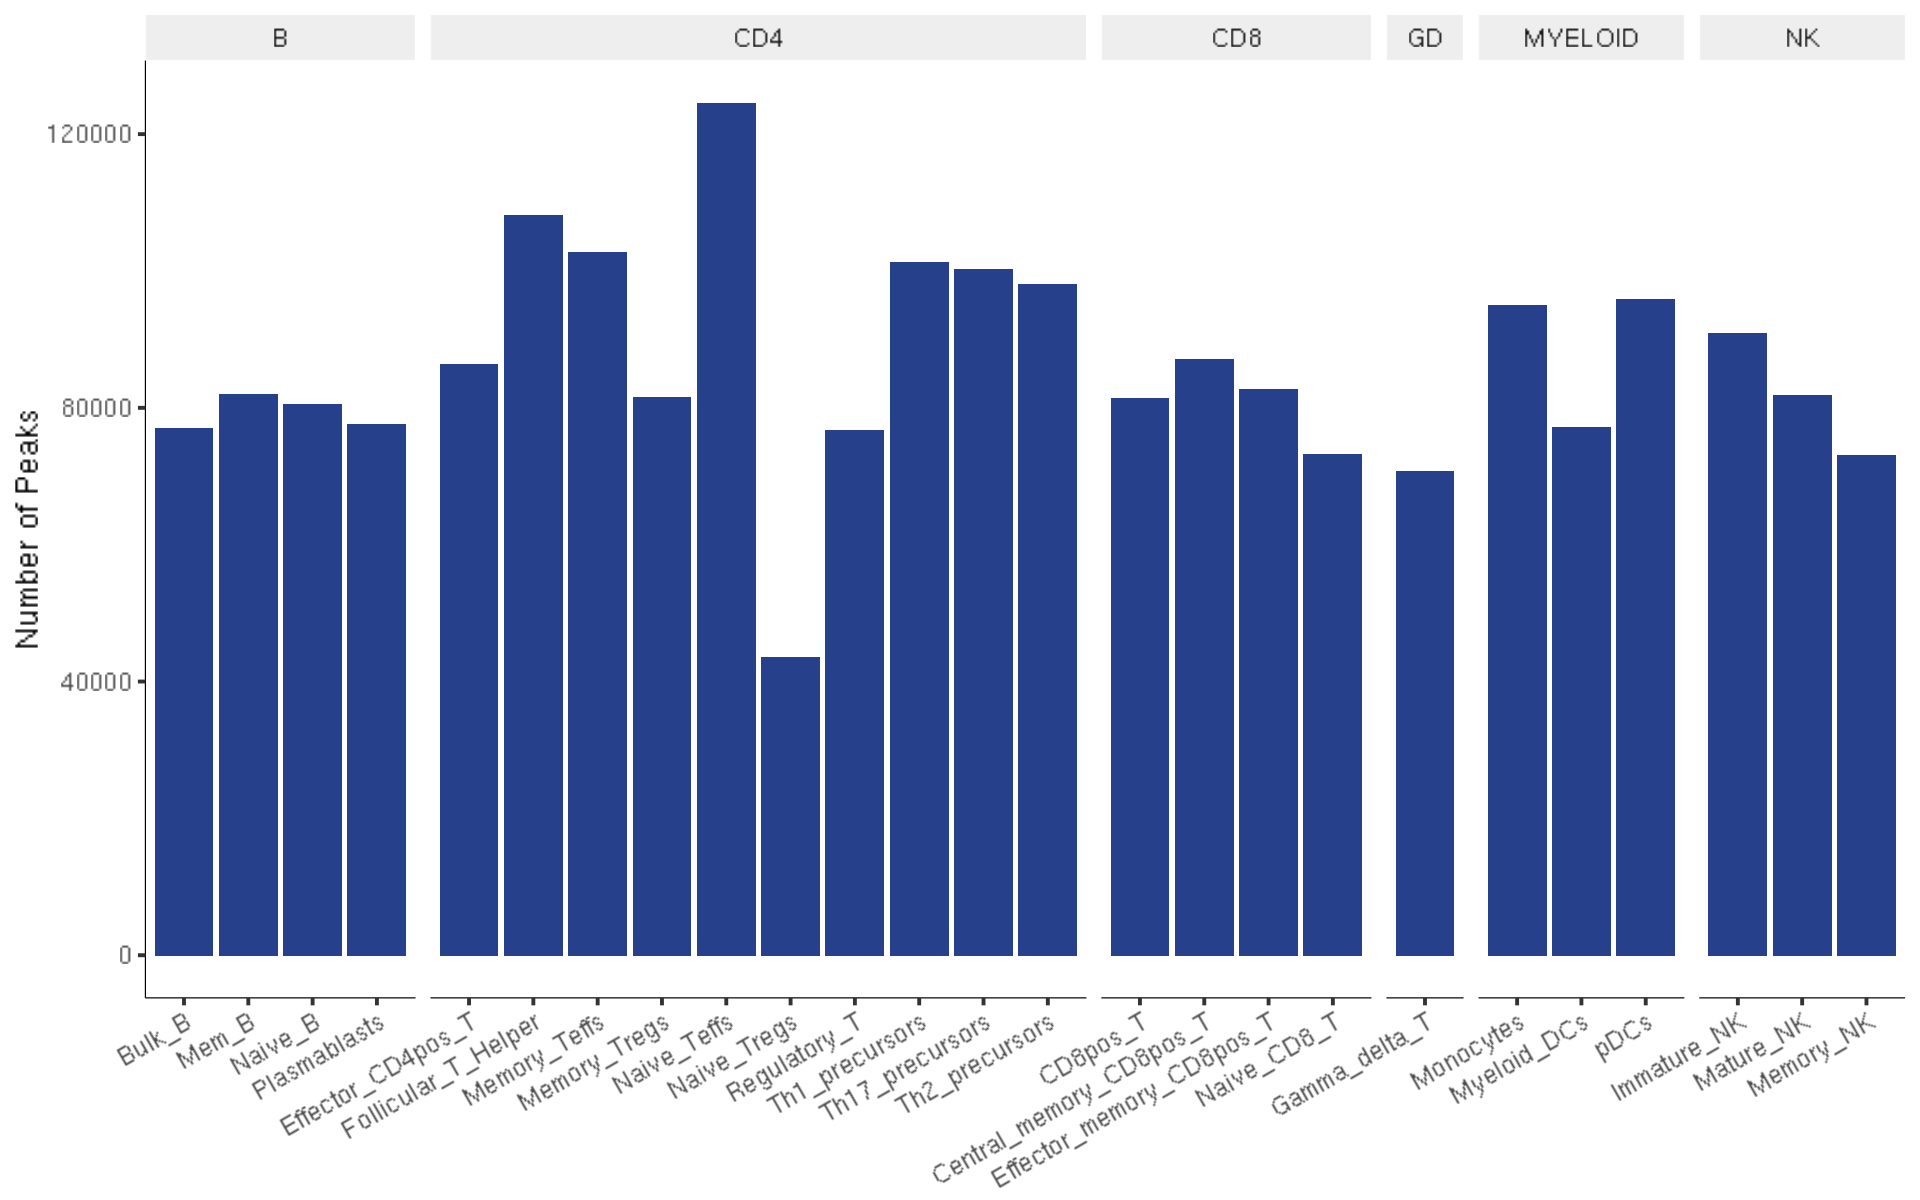

In [18]:
options(repr.plot.width=16, repr.plot.height=10)

ia.n.ct.peaks %>%
    ggplot() +
    geom_bar(aes(x=Cell.Type, y=Count), stat="identity", fill="royalblue4") +
    facet_grid(. ~ Lineage, scale="free_x", space="free_x") +
    ylab("Number of Peaks") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=30, hjust=1), axis.title.x=element_blank())

ggsave("03_Functional_Interpretation/results/immune_cell_peak_counts.pdf", width=16, height=10)

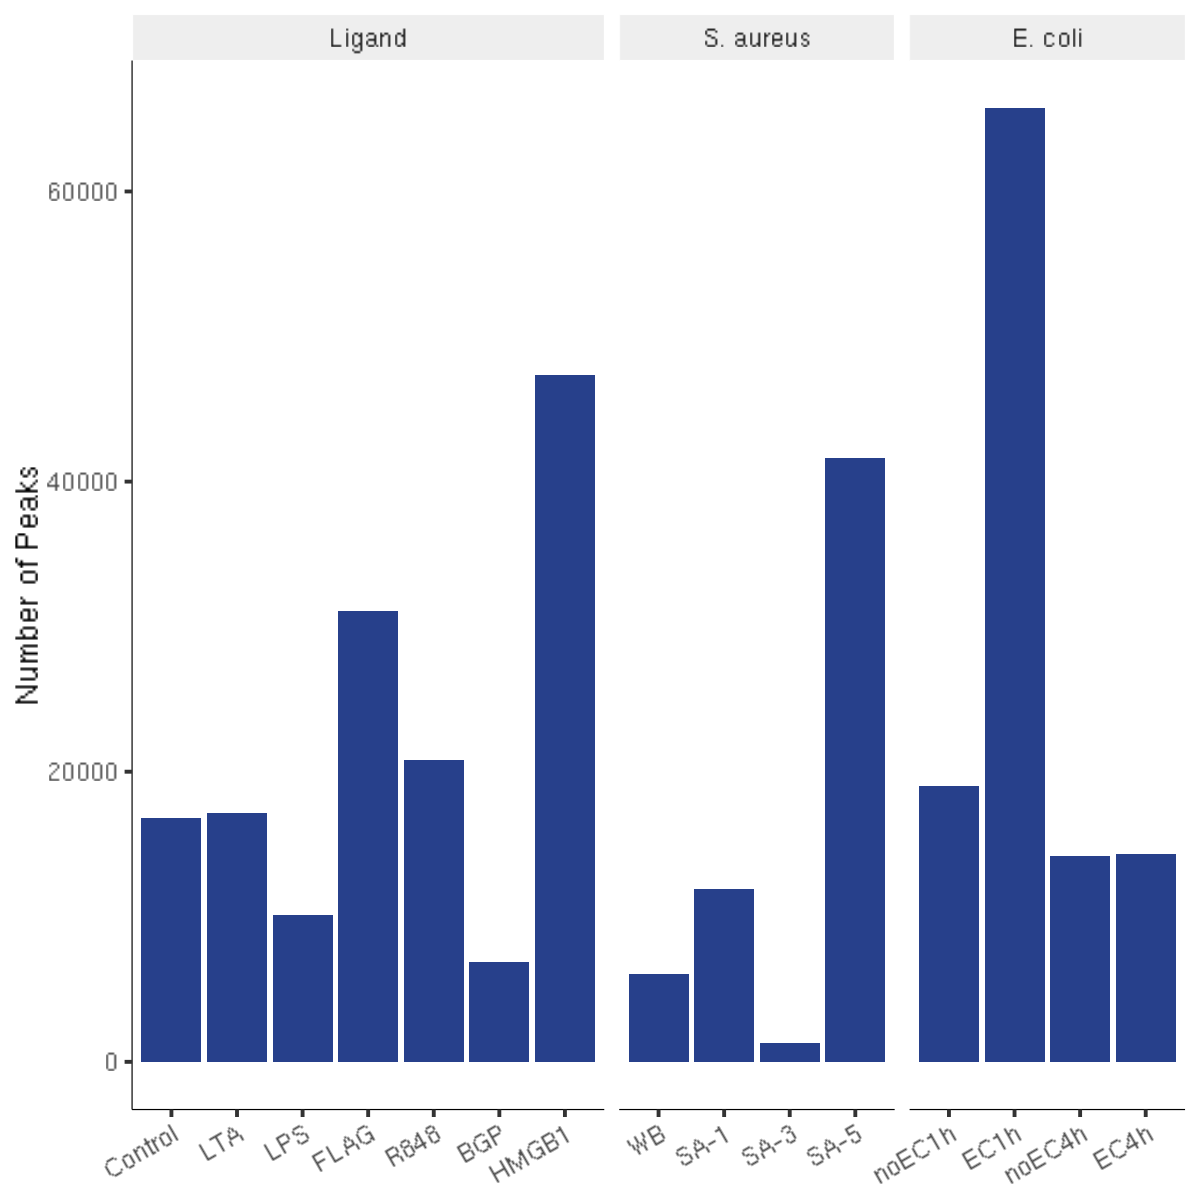

In [19]:
options(repr.plot.width=10, repr.plot.height=10)

order <- c(
    "Control", "LTA", "LPS", "FLAG", "R848", "BGP", "HMGB1",
    "WB", "SA-1", "SA-3", "SA-5",
    "noEC1h", "EC1h", "noEC4h", "EC4h"
)

rm.n.peaks %>%
    dplyr::arrange(desc(Count)) %>%
    dplyr::mutate(Group = factor(Group, levels=order)) %>%
    ggplot() +
    geom_bar(aes(x=Group, y=Count), stat="identity", fill="royalblue4") +
    facet_grid(. ~ Category, scale="free_x", space="free_x") +
    ylab("Number of Peaks") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=30, hjust=1), axis.title.x=element_blank())

ggsave("03_Functional_Interpretation/results/neutrophil_group_peak_counts.pdf", width=10, height=10)

## Jaccard

Do the peaks, by themselves, differentiate cell types and groups adequately?

In [94]:
jaccard.mtx <- ia.group.jaccard %>%
    tidyr::spread(Group.Y, Jaccard)

rownames(jaccard.mtx) <- jaccard.mtx$Group.X
jaccard.mtx$Group.X <- NULL

jaccard.mtx <- as.matrix(jaccard.mtx)

In [95]:
jaccard.lineages <- lineages$Lineage[match(gsub("-.*$", "", rownames(jaccard.mtx)), lineages$Cell_Type)]

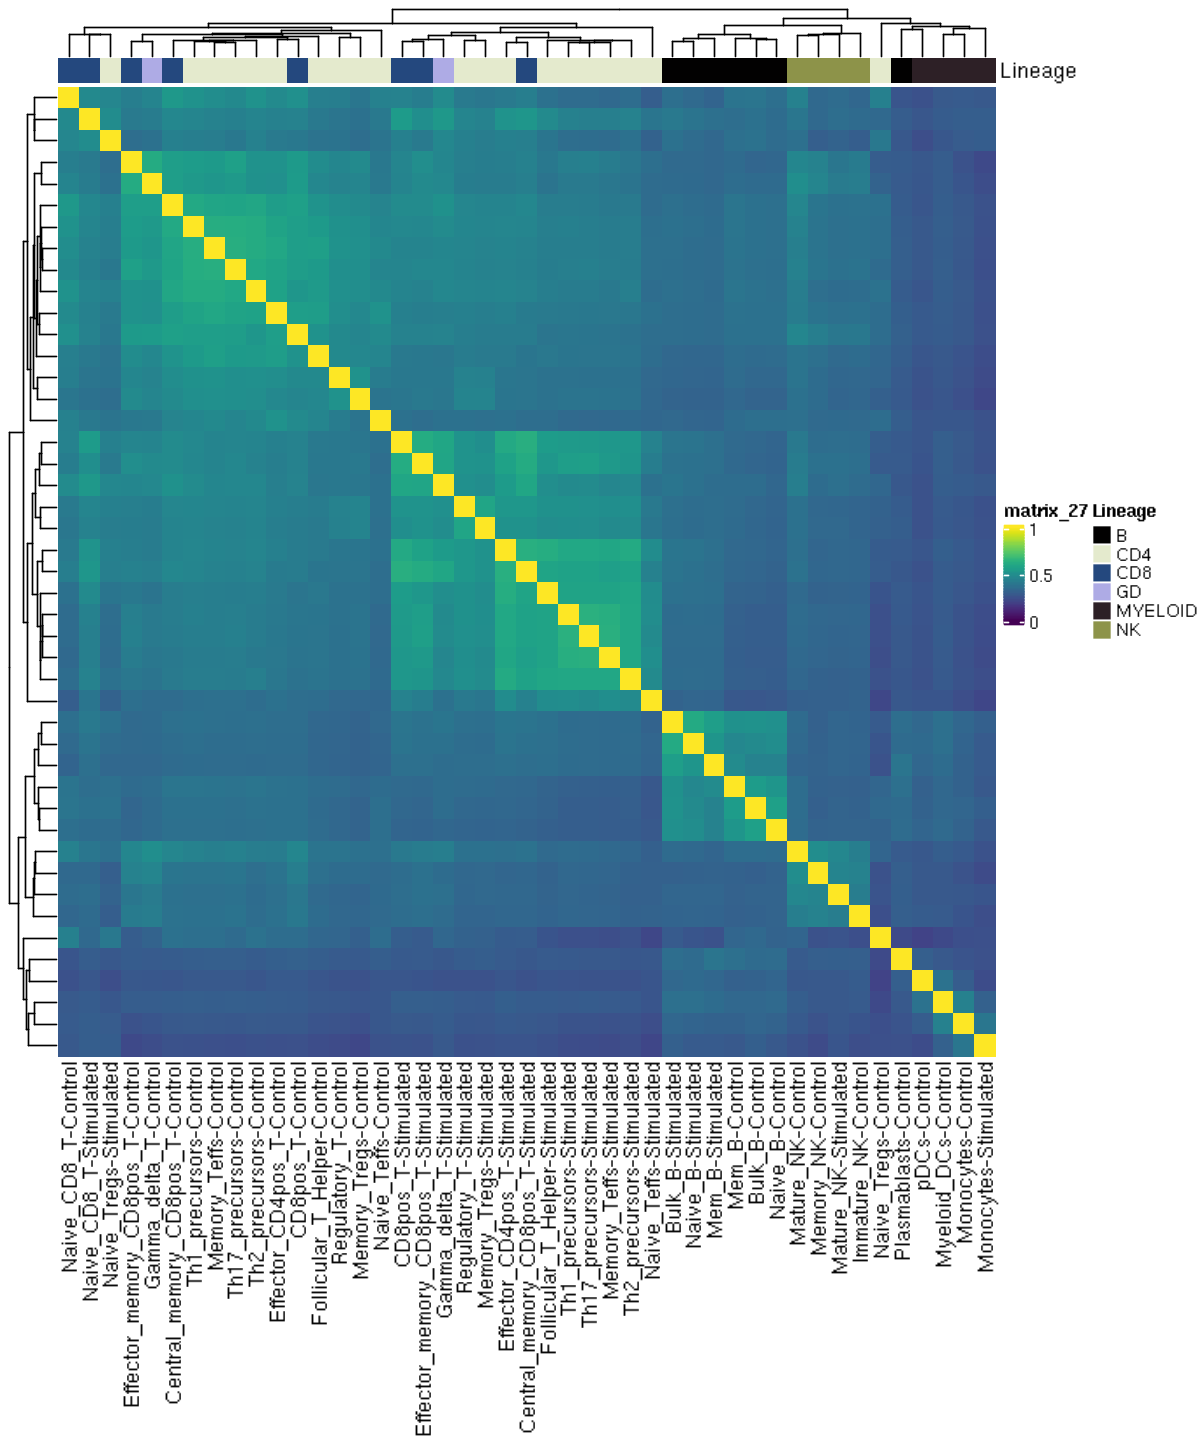

In [97]:
options(repr.plot.width=10, repr.plot.height=12)

col.fun = colorRamp2(seq(0, 1, length.out=100), viridis::viridis(n=100))

ha = HeatmapAnnotation(Lineage = jaccard.lineages)

ComplexHeatmap::Heatmap(
    jaccard.mtx, col=col.fun, show_row_names=F,
    column_names_max_height=max_text_width(
        rownames(jaccard.mtx), 
        gp = gpar(fontsize = 12)
    ),
    top_annotation=ha
)

In [46]:
jaccard.mtx <- ia.cell.jaccard %>%
    tidyr::spread(Group.Y, Jaccard)

rownames(jaccard.mtx) <- jaccard.mtx$Group.X
jaccard.mtx$Group.X <- NULL

jaccard.mtx <- as.matrix(jaccard.mtx)

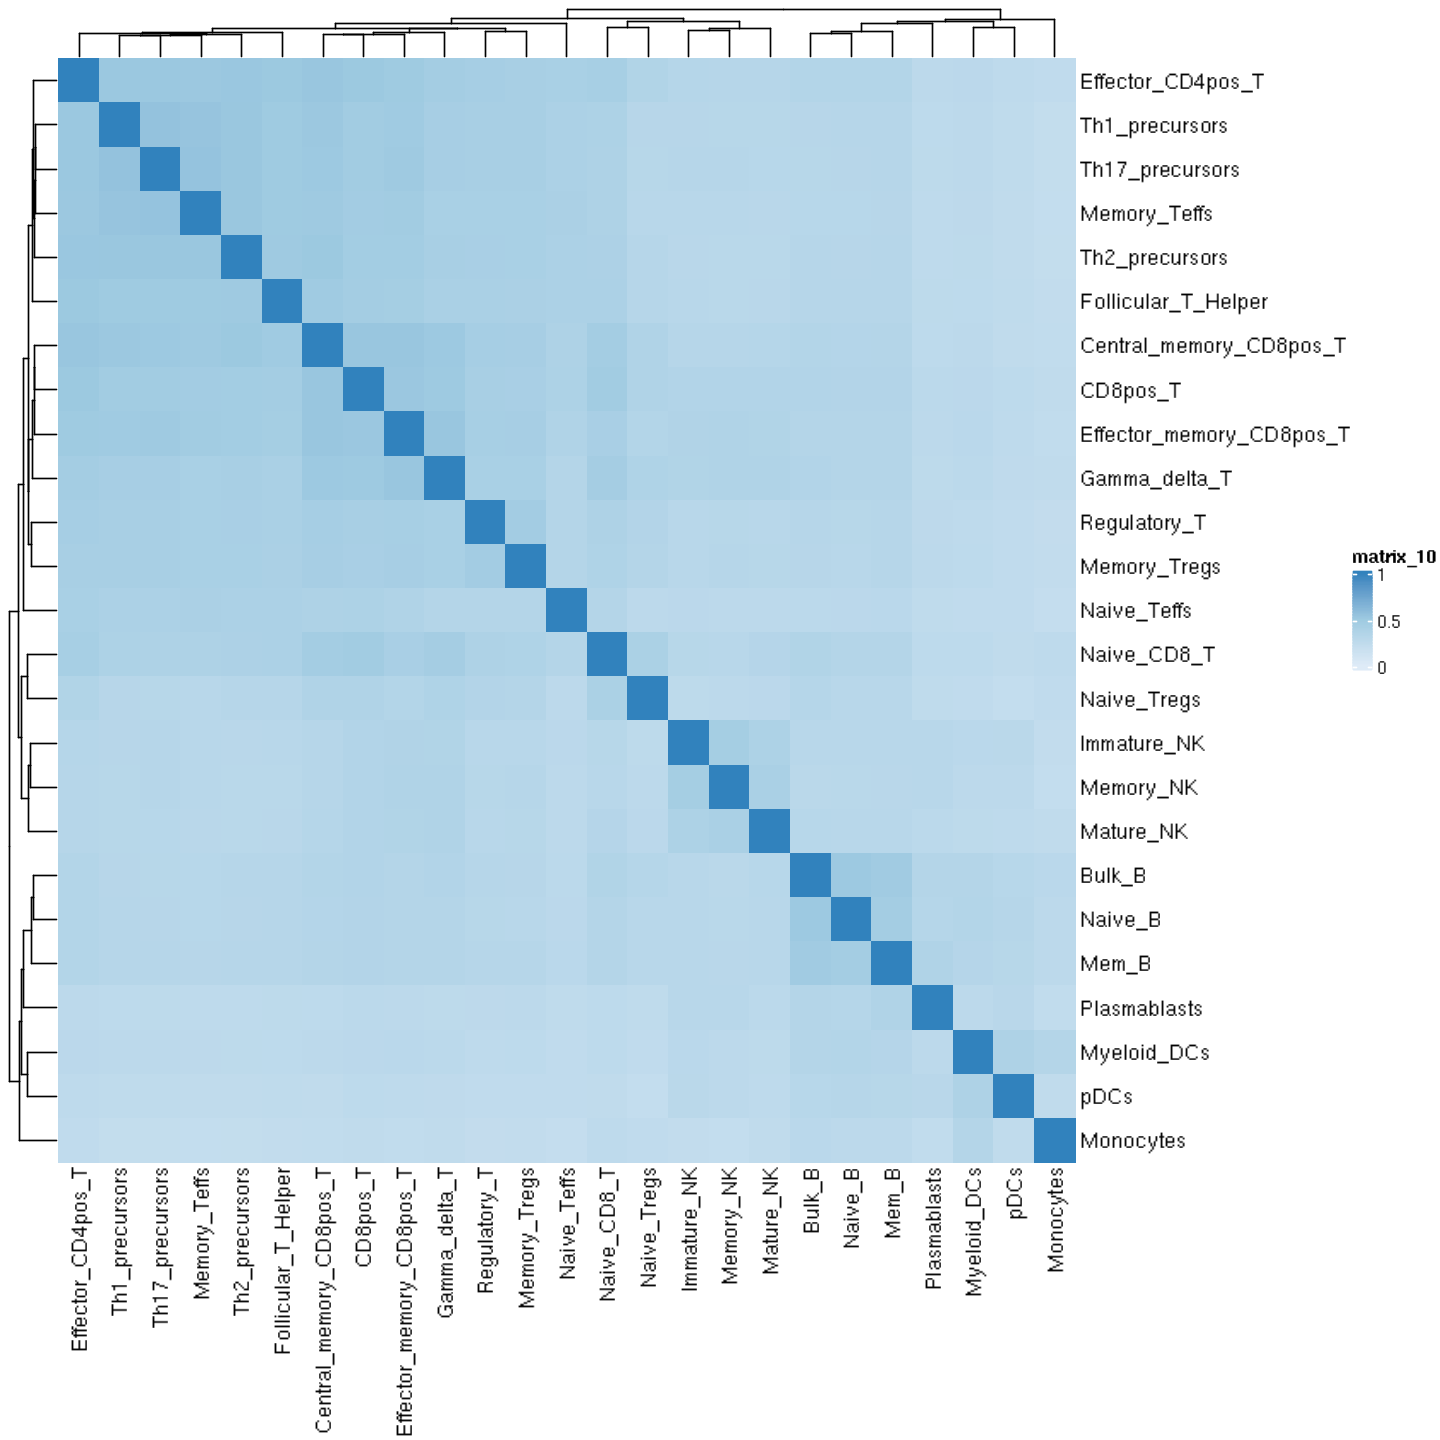

In [47]:
options(repr.plot.width=12, repr.plot.height=12)

col.fun = colorRamp2(c(0, 0.5, 1), brewer.pal(3, "Blues"))

ComplexHeatmap::Heatmap(jaccard.mtx, col=col.fun)

In [42]:
jaccard.mtx <- rm.group.jaccard %>%
    tidyr::spread(Group.Y, Jaccard)

rownames(jaccard.mtx) <- jaccard.mtx$Group.X
jaccard.mtx$Group.X <- NULL

jaccard.mtx <- as.matrix(jaccard.mtx)

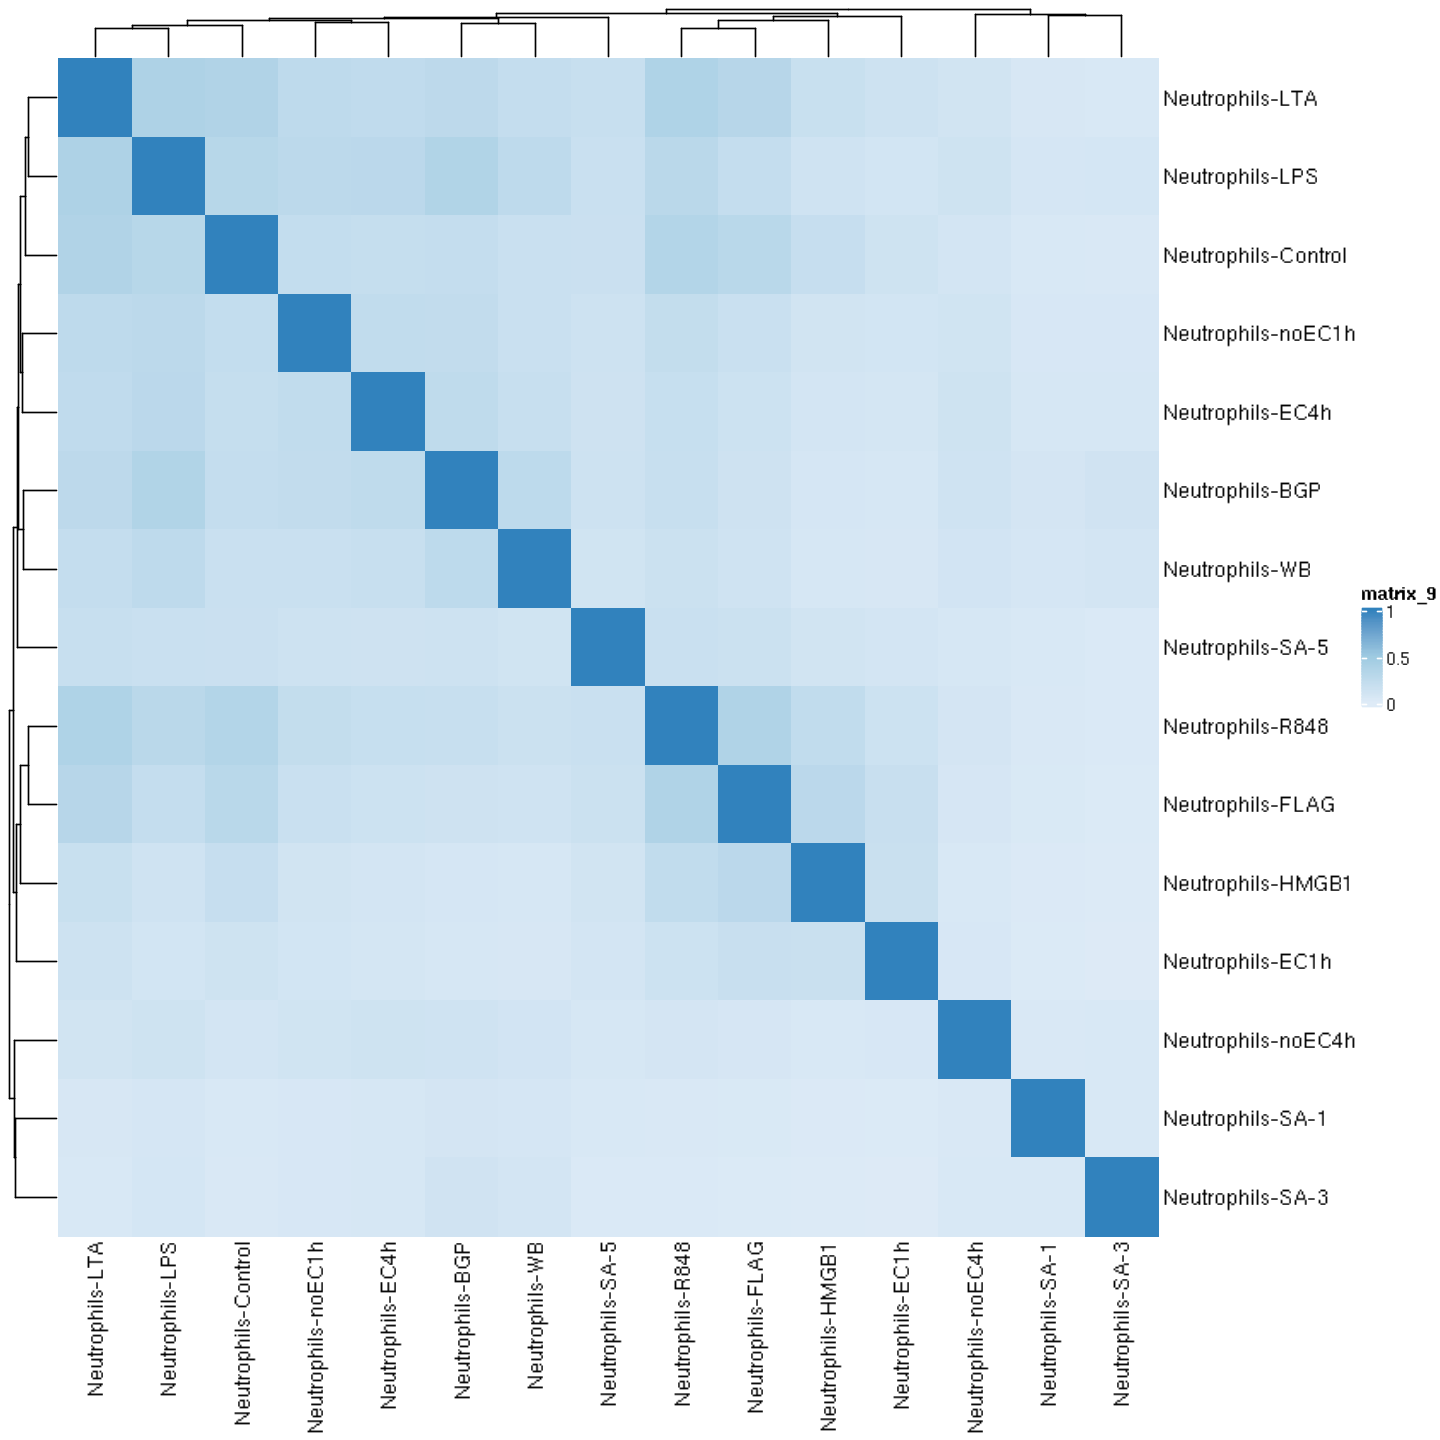

In [43]:
options(repr.plot.width=12, repr.plot.height=12)

col.fun = colorRamp2(c(0, 0.5, 1), brewer.pal(3, "Blues"))

ComplexHeatmap::Heatmap(jaccard.mtx, col=col.fun)